# 🌲 Random Forest vs ⚡ XGBoost — California Housing Regression

This personalized notebook trains and compares Random Forest and XGBoost regressors on the California Housing dataset. It measures both accuracy (MSE, R²) and speed (train/predict time), and includes clean plots and concise commentary.

If XGBoost isn't installed in your environment, run the optional install cell below.

In [1]:
# OPTIONAL: install xgboost if missing (uncomment to run)
# %pip install xgboost
print('If xgboost import fails later, uncomment and run this cell.')

If xgboost import fails later, uncomment and run this cell.


In [2]:
# Imports
import time
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


## 1) Load data and split
California Housing: predict median house value (target y) from 8 numeric features (X).

In [3]:
data = fetch_california_housing()
X, y = data.data, data.target

# 20% test split with fixed seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

## 2) Initialize models
Use the same number of trees/estimators for a fair baseline comparison.

In [4]:
n_estimators = 100
rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
xgb = XGBRegressor(n_estimators=n_estimators, random_state=42, verbosity=0)
rf, xgb

(RandomForestRegressor(random_state=42),
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...))

## 3) Train with timing
Capture wall-clock time to compare training speed.

In [5]:
# Train Random Forest
t0 = time.time()
rf.fit(X_train, y_train)
rf_train_time = time.time() - t0

# Train XGBoost
t0 = time.time()
xgb.fit(X_train, y_train)
xgb_train_time = time.time() - t0

rf_train_time, xgb_train_time

(14.018854856491089, 0.15201926231384277)

## 4) Predict with timing and compute metrics
Report MSE and R², plus prediction time.

In [6]:
# Predict RF
t0 = time.time()
y_pred_rf = rf.predict(X_test)
rf_pred_time = time.time() - t0

# Predict XGB
t0 = time.time()
y_pred_xgb = xgb.predict(X_test)
xgb_pred_time = time.time() - t0

# Metrics
mse_rf  = mean_squared_error(y_test, y_pred_rf)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_rf   = r2_score(y_test, y_pred_rf)
r2_xgb  = r2_score(y_test, y_pred_xgb)

print(f'Random Forest:  MSE = {mse_rf:.4f},  R^2 = {r2_rf:.4f},  train = {rf_train_time:.3f}s, predict = {rf_pred_time:.3f}s')
print(f'XGBoost:       MSE = {mse_xgb:.4f},  R^2 = {r2_xgb:.4f},  train = {xgb_train_time:.3f}s, predict = {xgb_pred_time:.3f}s')

Random Forest:  MSE = 0.2554,  R^2 = 0.8051,  train = 14.019s, predict = 0.113s
XGBoost:       MSE = 0.2226,  R^2 = 0.8301,  train = 0.152s, predict = 0.002s


## 5) Visualize predictions vs. actuals
Scatter against the ideal y=x line; show ±1 standard deviation band of y_test as context.

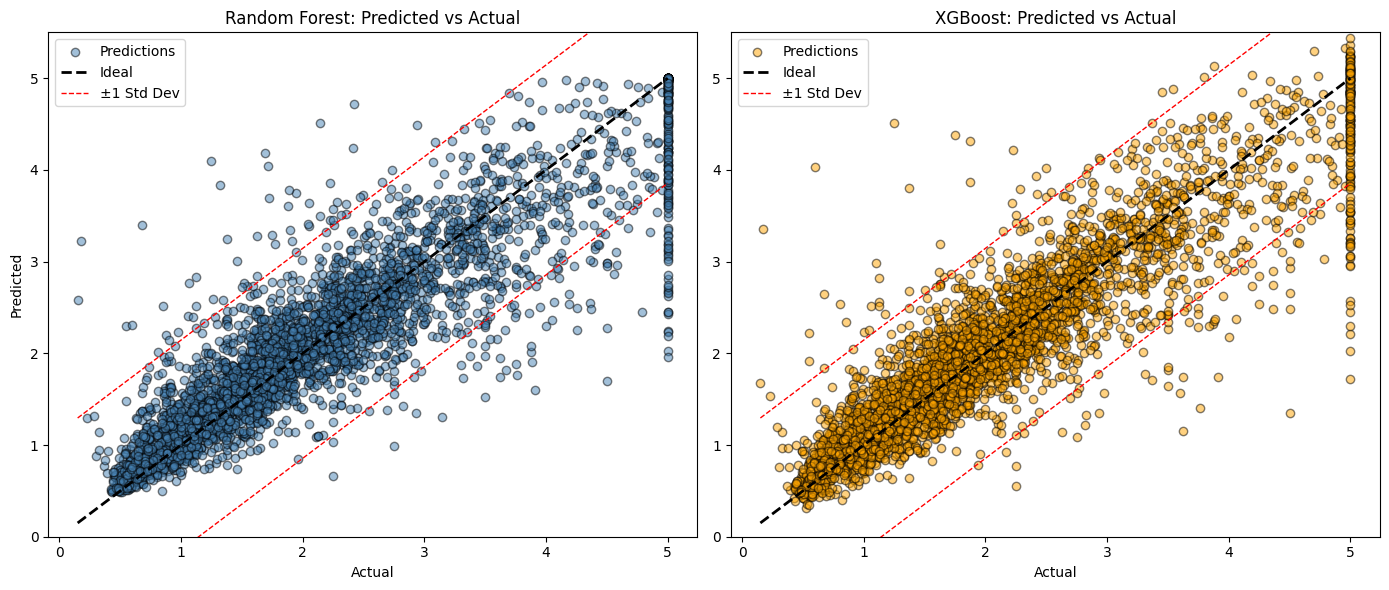

In [7]:
std_y = np.std(y_test)
ymin, ymax = float(np.min(y_test)), float(np.max(y_test))

plt.figure(figsize=(14,6))
# Random Forest
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='steelblue', ec='k', label='Predictions')
plt.plot([ymin, ymax],[ymin, ymax], 'k--', lw=2, label='Ideal')
plt.plot([ymin, ymax],[ymin+std_y, ymax+std_y], 'r--', lw=1, label='±1 Std Dev')
plt.plot([ymin, ymax],[ymin-std_y, ymax-std_y], 'r--', lw=1)
plt.ylim(0, ymax*1.1)
plt.title('Random Forest: Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

# XGBoost
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color='orange', ec='k', label='Predictions')
plt.plot([ymin, ymax],[ymin, ymax], 'k--', lw=2, label='Ideal')
plt.plot([ymin, ymax],[ymin+std_y, ymax+std_y], 'r--', lw=1, label='±1 Std Dev')
plt.plot([ymin, ymax],[ymin-std_y, ymax-std_y], 'r--', lw=1)
plt.ylim(0, ymax*1.1)
plt.title('XGBoost: Predicted vs Actual')
plt.xlabel('Actual')
plt.legend()

plt.tight_layout()
plt.show()

## 6) Summary
- Random Forest: MSE = {mse_rf:.4f}, R² = {r2_rf:.4f}, train {rf_train_time:.3f}s, predict {rf_pred_time:.3f}s
- XGBoost:      MSE = {mse_xgb:.4f}, R² = {r2_xgb:.4f}, train {xgb_train_time:.3f}s, predict {xgb_pred_time:.3f}s

Notes:
- On this dataset, XGBoost often matches or outperforms Random Forest in both accuracy and speed, but results can vary by hardware and parameters.
- Try tuning n_estimators, max_depth, learning_rate (for XGB), and other hyperparameters for better results.